In [1]:
from modules.PageExtractor import *
from modules.utils import *

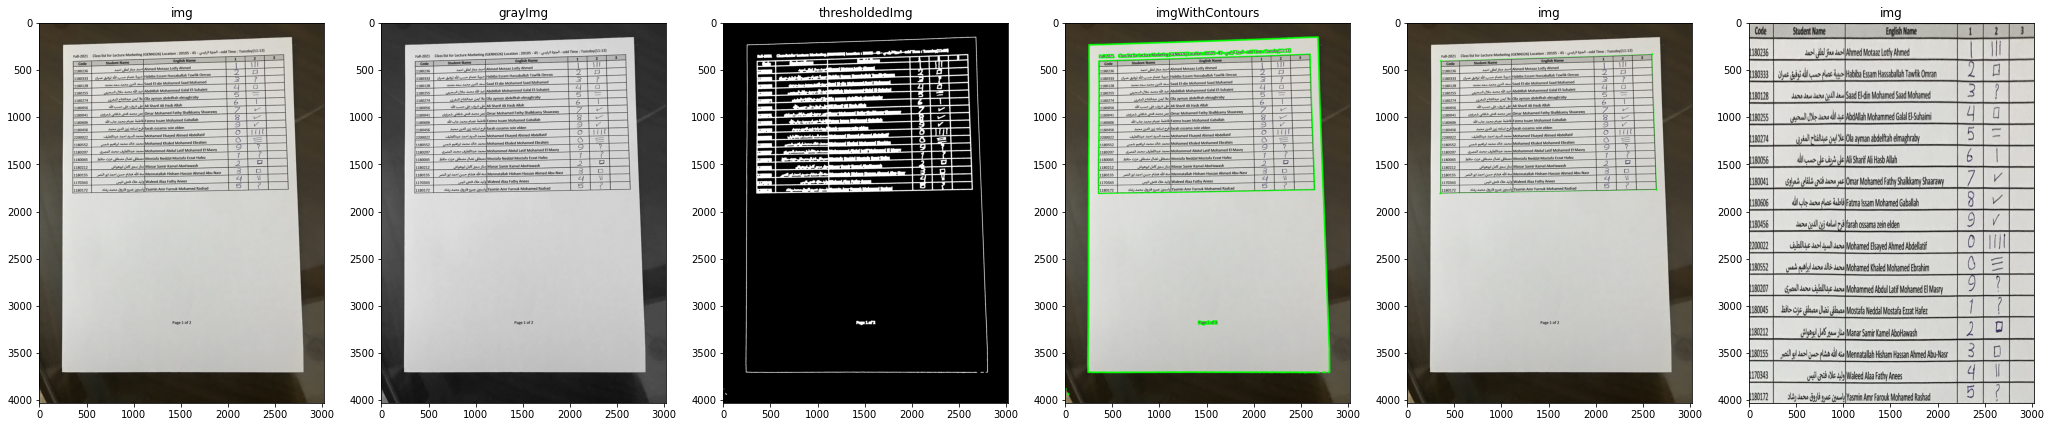

In [2]:
img=io.imread('./Data set/grade sheet/1.jpg')
imageArr=getPageWarped(img, thresh1=180)
show_images(imageArr,titles=['img','grayImg','thresholdedImg','imgWithContours','img','img'])
Table_Extracted=np.copy(imageArr[5])

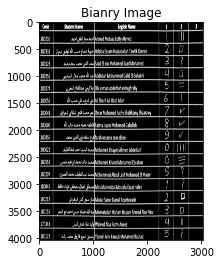

In [3]:
# print(np.max(Table_Extracted))
# print(np.shape(Table_Extracted))
# Table_Extracted=rgb2gray(Table_Extracted)
# Converting table to binary
thresh,img_bin = cv2.threshold(Table_Extracted,128,255,cv2.THRESH_BINARY)
# thresh,img_bin = cv2.threshold(Table_Extracted,128,255,cv2.THRESH_OTSU)

img_bin = 255-img_bin
show_images([img_bin],titles=['Bianry Image'])

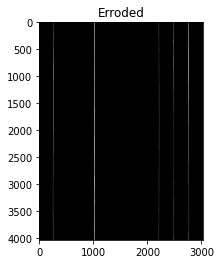

In [12]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
# print(vertical_kernel)
eroded_image = cv2.erode(img_bin, vertical_kernel, iterations=10)
show_images([eroded_image],titles=['Erroded'])

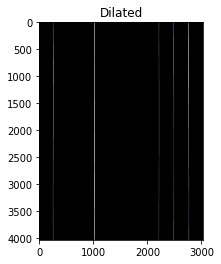

In [13]:
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=10)
show_images([vertical_lines],titles=['Dilated'])

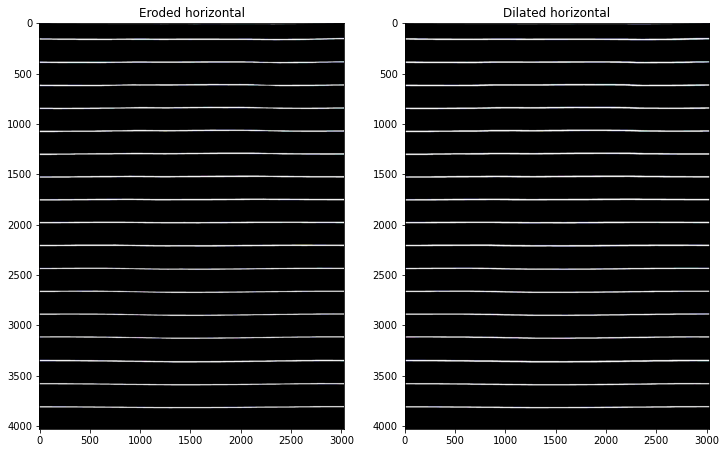

In [15]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
image_2 = cv2.erode(img_bin, hor_kernel, iterations=10)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=10)
show_images([image_2,horizontal_lines],titles=['Eroded horizontal','Dilated horizontal'])

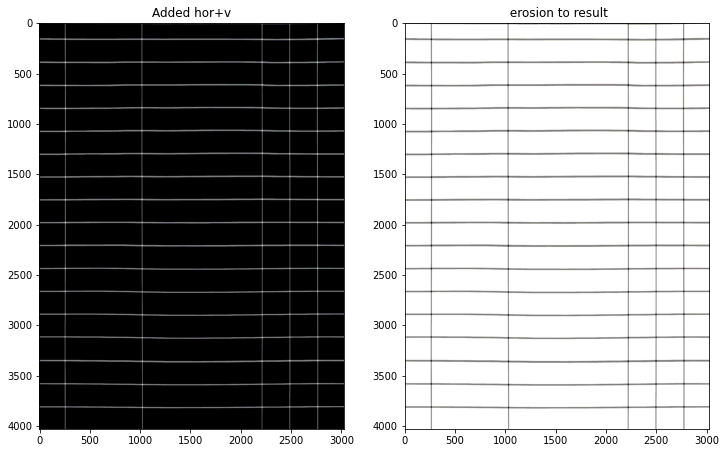

In [20]:
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines_2 = cv2.erode(~vertical_horizontal_lines, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)), iterations=3)
show_images([vertical_horizontal_lines,vertical_horizontal_lines_2],titles=['Added hor+v',' erosion to result'])

(4030, 3024, 3)


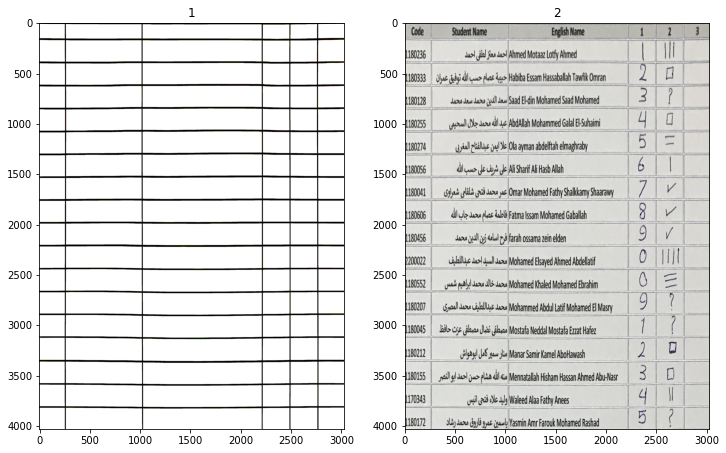

In [30]:
thresh, vertical_horizontal_lines_3 = cv2.threshold(vertical_horizontal_lines_2,128,255, cv2.THRESH_BINARY)
b_image = cv2.bitwise_not(cv2.bitwise_xor(Table_Extracted,vertical_horizontal_lines_3))
show_images([vertical_horizontal_lines_3,b_image],titles=['1','2'])